In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
train_path = "E:\mnist-in-csv\mnist_train.csv"
test_path = "E:\mnist-in-csv\mnist_test.csv"
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [3]:
y_train = pd.DataFrame(train_data["label"])
y_test = pd.DataFrame(test_data["label"])
X_train = train_data.drop("label", axis = 1)
X_test = test_data.drop("label", axis = 1)

In [4]:
X_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
def get_bat(df, x):
    return df[x:x+100]

In [7]:
X_test.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y_test.head()

,label
0,7
1,2
2,1
3,0
4,4


In [11]:
y_train.head()

,label
0,5
1,0
2,4
3,1
4,9


In [12]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms


In [13]:
X_train = torch.from_numpy(X_train.to_numpy())
X_test = torch.from_numpy(X_test.to_numpy())
y_train = torch.from_numpy(y_train.to_numpy())
y_test = torch.from_numpy(y_test.to_numpy())

In [14]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.Softmax(dim = 1))

# Define the loss
criterion = nn.CrossEntropyLoss()
# Forward pass, get our logits
logits = model(X_train.float())
y_train = y_train.reshape(60000)
logits = logits.reshape(60000, 10)
print(logits.size(), y_train.size())
# Calculate the loss with the logits and the labels
loss = criterion(logits, y_train)

print(loss)

torch.Size([60000, 10]) torch.Size([60000])
tensor(2.3202, grad_fn=<NllLossBackward>)


In [17]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [18]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)
print("Done")

Done


In [22]:
epochs = 100
for e in range(epochs):
    los = 0
    for i in range(0, 59000, 100):
        tf = get_bat(X_train, i)
        tl = get_bat(y_train, i)
        optimizer.zero_grad()
        output = model(tf.float())
        tl = tl.reshape(100)
        output = output.reshape(100, 10)
        loss = criterion(output, tl)
        loss.backward()
        optimizer.step()
        los += loss.item()
    print(e, " --", los/600)

0  -- 1.444849127928416
1  -- 1.4447681260108949
2  -- 1.444788231253624
3  -- 1.4446907744805018
4  -- 1.4446616580088933
5  -- 1.444607522090276
6  -- 1.4445134538412094
7  -- 1.444515418012937
8  -- 1.4444663079579672
9  -- 1.444436045885086
10  -- 1.444447923898697
11  -- 1.4443496108055114
12  -- 1.4442860108613969
13  -- 1.4442470681667328
14  -- 1.4442345676819484
15  -- 1.4442198185125987
16  -- 1.4442010021209717
17  -- 1.4441246076424916
18  -- 1.4440970091025034
19  -- 1.4440912546714146
20  -- 1.444075066248576
21  -- 1.444042812983195
22  -- 1.4440387044350307
23  -- 1.444004847407341
24  -- 1.4439987103144327
25  -- 1.444038356145223
26  -- 1.4440523833036423
27  -- 1.443955602645874
28  -- 1.4439373805125555
29  -- 1.4439312334855396
30  -- 1.443913860519727
31  -- 1.4438938562075296
32  -- 1.443888965646426
33  -- 1.4438857160011926
34  -- 1.4438836564620336
35  -- 1.4438689015309016
36  -- 1.4438785392045974
37  -- 1.443842025200526
38  -- 1.4438104383150736
39  -- 1.4

In [23]:
logits1 = model(X_test.float())
y_test = y_test.reshape(10000)
logits1 = logits1.reshape(10000, 10)
print(logits1.size(), y_test.size())
# Calculate the loss with the logits and the labels
loss = criterion(logits1, y_test)

print(loss)

torch.Size([10000, 10]) torch.Size([10000])
tensor(1.4874, grad_fn=<NllLossBackward>)


In [45]:
pr = 0
for i in range(len(y_test)):
    #print(y_test[i], logits[i])
    values, indices = logits1.max(1)
    #print(indices.size())
    if y_test[i] == indices[i]:
        pr += 1
print(pr/10000)

0.9735


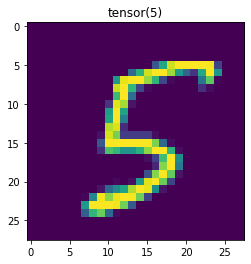

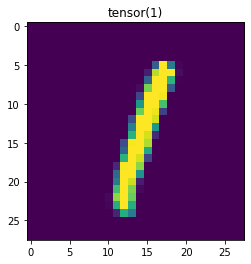

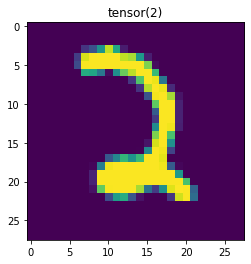

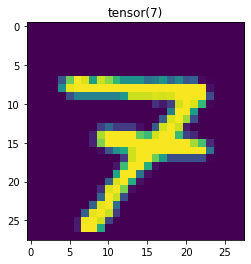

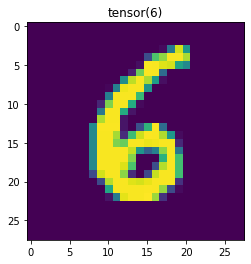

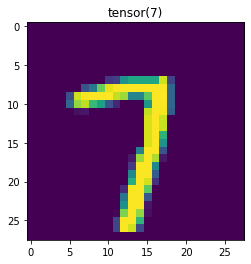

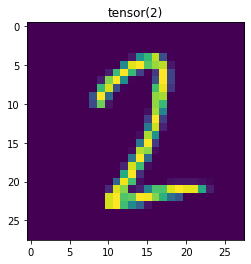

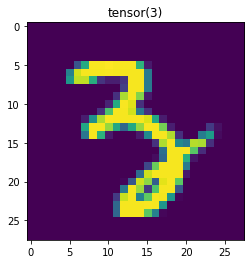

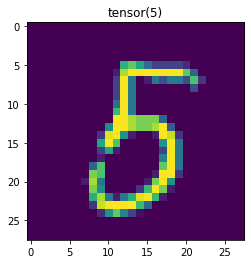

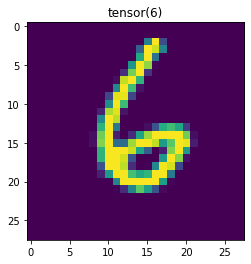

In [48]:
import matplotlib.pyplot as plt
arr = [23, 5, 423, 64, 986, 263, 456, 87, 45, 392]
for i in arr:
    plt.figure()
    plt.imshow(X_test[i].reshape(28, 28))
    plt.title(indices[i])